**LIBRARIES**

2025-04-30 14:14:11.994640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746022452.161958      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746022452.208860      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1746022464.368084      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


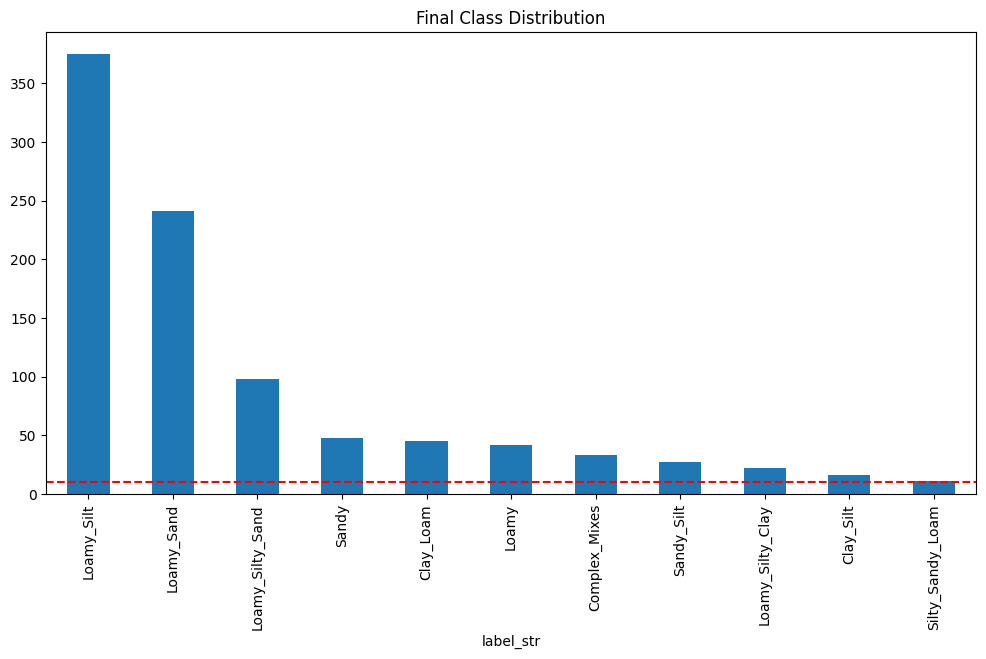


=== Phase 1: Training at 128px ===
Using compatibility mode for weights loading
Epoch 1/10


I0000 00:00:1746022501.386681      91 service.cc:148] XLA service 0x7cb9f004c060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746022501.387494      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746022505.917829      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/42 ━━━━━━━━━━━━━━━━━━━━ 38:08 56s/step - accuracy: 0.0000e+00 - loss: 3.6904

I0000 00:00:1746022523.902133      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 643s 14s/step - accuracy: 0.3332 - loss: 3.5023 - val_accuracy: 0.3958 - val_loss: 2.3946 - learning_rate: 1.0000e-04
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 603s 14s/step - accuracy: 0.3856 - loss: 3.4975 - val_accuracy: 0.3958 - val_loss: 2.3913 - learning_rate: 1.0000e-04
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 620s 14s/step - accuracy: 0.3856 - loss: 3.4927 - val_accuracy: 0.3958 - val_loss: 2.3881 - learning_rate: 1.0000e-04
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 606s 14s/step - accuracy: 0.3856 - loss: 3.4879 - val_accuracy: 0.3958 - val_loss: 2.3848 - learning_rate: 1.0000e-04
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 601s 14s/step - accuracy: 0.3856 - loss: 3.4831 - val_accuracy: 0.3958 - val_loss: 2.3816 - learning_rate: 1.0000e-04
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 601s 14s/step - accuracy: 0.3856 - loss: 3.4792 - val_accuracy: 0.3958 - val_loss: 2.3806 - learning_rate: 3.0000e-05
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 602s 14s/step - accuracy: 0.3856 - lo

E0000 00:00:1746028606.665899      91 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746028606.871183      91 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


41/42 ━━━━━━━━━━━━━━━━━━━━ 13s 14s/step - accuracy: 0.3853 - loss: 3.4720

E0000 00:00:1746029185.843160      91 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746029186.048423      91 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


42/42 ━━━━━━━━━━━━━━━━━━━━ 635s 14s/step - accuracy: 0.3856 - loss: 3.4725 - val_accuracy: 0.3958 - val_loss: 2.3767 - learning_rate: 1.0000e-06
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 597s 14s/step - accuracy: 0.3856 - loss: 3.4724 - val_accuracy: 0.3958 - val_loss: 2.3767 - learning_rate: 1.0000e-06
Epoch 3/20
 7/42 ━━━━━━━━━━━━━━━━━━━━ 8:15 14s/step - accuracy: 0.3732 - loss: 3.4424

KeyboardInterrupt: 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, applications
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

# ─── Configuration ────────────────────────────────────────────────────────
class Config:
    DATA_PATH = '/kaggle/input/soil-distribution/model_training_img'
    PHASE1_SIZE = 128
    PHASE2_SIZE = 224
    BATCH_SIZE = 16
    MIN_SAMPLES = 10
    EPOCHS_HEAD = 10
    EPOCHS_FINE = 20
    AUGMENTATIONS = 5
    FINE_TUNE_PERCENT = 0.1

# ─── Data Loading & Preparation (Updated) ──────────────────────────────────
def load_and_prepare_data(config):
    p = Path(config.DATA_PATH)
    if not p.exists():
        raise FileNotFoundError(f"Directory not found: {p}")

    files = list(p.glob('*.JPG')) + list(p.glob('*.jpeg')) + list(p.glob('*.jpg'))
    records = []
    for fp in files:
        parts = fp.stem.split('_')
        texture_idx = next((i for i, part in enumerate(parts) if part.lower() == 'texture'), None)
        if texture_idx is None:
            continue
        label = '_'.join(parts[texture_idx + 1:]).strip().strip('_')
        records.append({'filepath': str(fp), 'label_str': label})

    df = pd.DataFrame(records)
    if df.empty:
        raise ValueError("No valid image filenames parsed.")

    # Updated consolidation map with standardized names
    consolidation_map = {
        # Standardize naming first
        'Laomy': 'Loamy',
        'Sandy_Loam': 'Loamy_Sand',
        'Silty_Loam': 'Loamy_Silt',
        'Clay_Loam': 'Clay_Loam',
        'Loamy_Clay': 'Clay_Loam',
        
        # Group rare classes
        'Clay_Sand': 'Complex_Mixes',
        'Clay_Silty_Sand': 'Complex_Mixes',
        'Loamy_Clay_Sand': 'Complex_Mixes',
        'Silty_Loamy_Sand': 'Complex_Mixes',
        'Silty_Clay': 'Clay_Silt',
        'Clay_Silt': 'Clay_Silt',
        
        # Main categories
        'Combined_Loamy_Sand_Sandy_Loam': 'Loamy_Sand',
        'Combined_Loamy_Silt_Silty_Loam': 'Loamy_Silt',
        'Combined_Clay_Loam_Loamy_Clay': 'Clay_Loam',
        'Combined_Complex_Mixes': 'Complex_Mixes',
        'Combined_Silty_Clay_Clay_Silt': 'Clay_Silt',
        
        # Handle tiny classes
        'Clay_Soil': 'Other',
        'Silty_Soil': 'Other',
        'Sandy_Soil': 'Other',
        'Loamy_Soil': 'Loamy',
        'Silty_Sand': 'Sandy'  # High sand content
    }

    df['label_str'] = df['label_str'].replace(consolidation_map)
    
    # Final filtering
    counts = df['label_str'].value_counts()
    keep = counts[counts >= config.MIN_SAMPLES].index
    df = df[df['label_str'].isin(keep)].reset_index(drop=True)
    
    # Add label encoding
    df['label'] = df['label_str'].astype('category').cat.codes
    label_map = dict(enumerate(df['label_str'].astype('category').cat.categories))
    
    # Plot class distribution
    plt.figure(figsize=(12,6))
    df['label_str'].value_counts().plot(kind='bar')
    plt.title('Final Class Distribution')
    plt.axhline(y=config.MIN_SAMPLES, color='r', linestyle='--')
    plt.show()
    
    return df, label_map

# ─── Enhanced Model Architecture ────────────────────────────────────────────
def build_model(input_size, num_classes):
    weights_path = '/kaggle/input/efficientnet-keras-weights/efficientnetb0_notop.h5'
    
    if not os.path.exists(weights_path):
        raise FileNotFoundError("Add EfficientNet weights dataset to Kaggle inputs")

    inputs = layers.Input((input_size, input_size, 3))
    base_model = applications.EfficientNetB0(
        include_top=False,
        weights=None,
        input_tensor=inputs,
        pooling='avg'
    )
    
    # Load weights with enhanced error handling
    try:
        base_model.load_weights(weights_path, by_name=True, skip_mismatch=True)
    except Exception as e:
        print(f"Error loading weights: {e}")
        print("Initializing with random weights")
    
    base_model.trainable = False
    
    # Enhanced classifier head
    x = layers.Dense(256, activation='relu')(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs, outputs), base_model

# ─── Dataset Pipeline ──────────────────────────────────────────────────────
class DataPipeline:
    def __init__(self, config):
        self.config = config
        self.augmentation = tf.keras.Sequential([
            layers.RandomFlip('horizontal_and_vertical'),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.25),
            layers.RandomContrast(0.2),
            layers.RandomBrightness(0.2),
            layers.GaussianNoise(0.1)
        ])
        
    def preprocess(self, img, label, img_size):
        img = tf.image.resize(img, [img_size, img_size])
        img = applications.efficientnet.preprocess_input(img)
        return img, label

    def create_dataset(self, df, img_size, augment=False):
        ds = tf.data.Dataset.from_tensor_slices(
            (df['filepath'].values, df['label'].values)
        )
        ds = ds.map(
            lambda p,l: (tf.io.read_file(p), l),
            num_parallel_calls=tf.data.AUTOTUNE
        )
        ds = ds.map(
            lambda i,l: (tf.image.decode_jpeg(i, channels=3), l),
            num_parallel_calls=tf.data.AUTOTUNE
        )
        if augment:
            ds = ds.map(
                lambda i,l: (self.augmentation(i), l),
                num_parallel_calls=tf.data.AUTOTUNE
            )
        ds = ds.map(
            lambda i,l: self.preprocess(i, l, img_size),
            num_parallel_calls=tf.data.AUTOTUNE
        )
        return ds.batch(self.config.BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# ─── Model Architecture ────────────────────────────────────────────────────
def build_model(input_size, num_classes):
    weights_path = '/kaggle/input/efficientnet-keras-weights-b0b5/efficientnet-b0_imagenet_1000_notop.h5'
    
    if not os.path.exists(weights_path):
        raise FileNotFoundError("Add EfficientNet weights dataset to Kaggle inputs")

    inputs = layers.Input((input_size, input_size, 3))
    base_model = applications.EfficientNetB0(
        include_top=False,
        weights=None,
        input_tensor=inputs,
        pooling='avg'
    )
    
    # ━━━━━━━━━━━━━━━━ Compatibility Loader ━━━━━━━━━━━━━━━━
    try:
        base_model.load_weights(weights_path)
    except ValueError as e:
        if "Layer count mismatch" in str(e):
            print("Using compatibility mode for weights loading")
            base_model.load_weights(
                weights_path,
                by_name=True,
                skip_mismatch=True
            )
        else:
            raise e
            
    base_model.trainable = False
    
    x = layers.Dropout(0.3)(base_model.output)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs, outputs), base_model

# ─── Learning Rate Schedule ────────────────────────────────────────────────
def warmup_schedule(epoch):
    if epoch < 5:
        return 1e-4
    elif epoch < 15:
        return 3e-5
    return 1e-5

# ─── Main Training Flow ────────────────────────────────────────────────────
def main():
    config = Config()
    dp = DataPipeline(config)
    
    # Load data and split
    df, label_map = load_and_prepare_data(config)
    num_classes = len(label_map)
    train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['label'])
    val_df, test_df = train_test_split(val_df, test_size=0.5, stratify=val_df['label'])
    
    # Class weighting
    class_counts = train_df['label'].value_counts()
    total_samples = len(train_df)
    class_weights = {
        i: (total_samples / (len(class_counts) * count)) ** 0.5  # Smooth weighting
        for i, count in enumerate(class_counts)
    }
    
    # Phase 1: Progressive resizing
    print("\n=== Phase 1: Training at 128px ===")
    train_ds = dp.create_dataset(train_df, config.PHASE1_SIZE, augment=True)
    val_ds = dp.create_dataset(val_df, config.PHASE1_SIZE)
    
    model, base_model = build_model(config.PHASE1_SIZE, num_classes)
    model.compile(
        optimizer=optimizers.Adam(1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=config.EPOCHS_HEAD,
        callbacks=[
            callbacks.EarlyStopping(patience=7, restore_best_weights=True),
            callbacks.ModelCheckpoint('phase1_best.keras', save_best_only=True),
            callbacks.LearningRateScheduler(warmup_schedule)
        ],
        class_weight=class_weights
    )
    
    # Phase 2: Full resolution fine-tuning
    print("\n=== Phase 2: Fine-tuning at 224px ===")
    model, base_model = build_model(config.PHASE2_SIZE, num_classes)
    model.load_weights('phase1_best.keras')
    
    # Configure fine-tuning
    base_model.trainable = True
    num_layers = len(base_model.layers)
    unfreeze_from = int(num_layers * (1 - config.FINE_TUNE_PERCENT))
    
    for layer in base_model.layers[:unfreeze_from]:
        layer.trainable = False
        
    for layer in base_model.layers:
        if isinstance(layer, layers.BatchNormalization):
            layer.trainable = False
    
    # Rebuild dataset at higher resolution
    train_ds = dp.create_dataset(train_df, config.PHASE2_SIZE, augment=True)
    val_ds = dp.create_dataset(val_df, config.PHASE2_SIZE)
    
    model.compile(
        optimizer=optimizers.Adam(1e-6),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history_fine = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=config.EPOCHS_FINE,
        callbacks=[
            callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            callbacks.ModelCheckpoint('final_model.keras', save_best_only=True),
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
        ],
        class_weight=class_weights
    )
    
    # Final evaluation
    print("\n=== Final Evaluation ===")
    test_ds = dp.create_dataset(test_df, config.PHASE2_SIZE)
    loss, acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

if __name__ == '__main__':
    main()